In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from scipy.signal import butter,filtfilt,welch


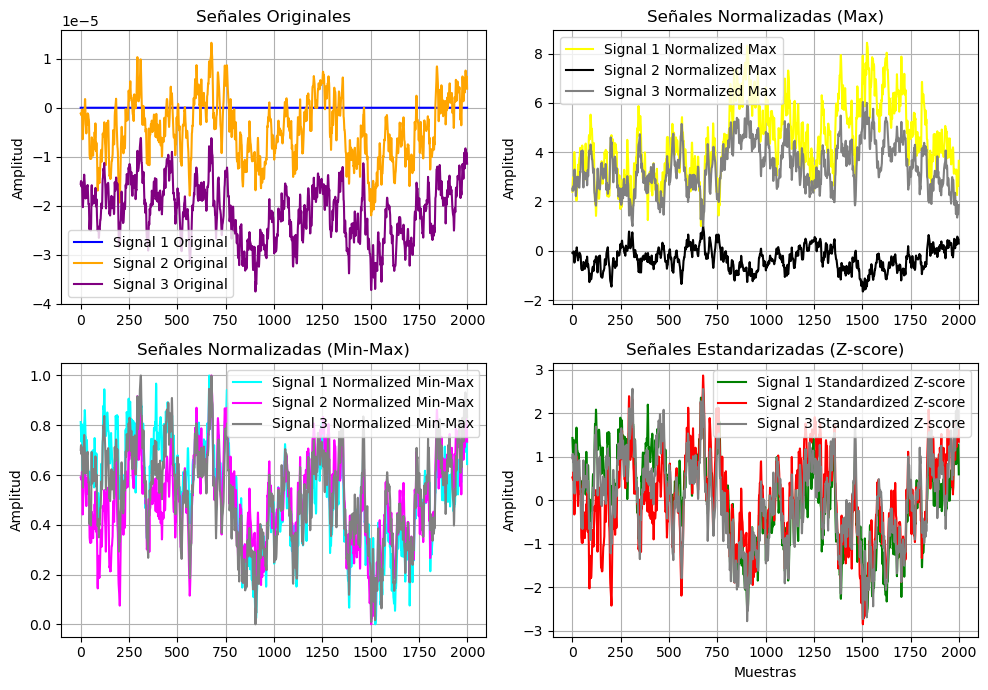

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Función para leer datos de archivos de texto
def read_signals(file_path):
    return np.loadtxt(file_path)

def normalize_max(signal):
    return signal / np.max(signal)

def normalize_min_max(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Función de estandarización Z-score
def standardize_z_score(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Función para graficar señales
def plot_signal(ax, signal_data, label, color):
    ax.plot(signal_data, label=label, color=color)

# Parámetros
fs = 500  # Frecuencia de muestreo (ajusta según sea necesario)

# Leer las señales de archivos de texto
signal1 = read_signals('P3_MNE.txt')*1e-4
signal2 = read_signals('P4_MNE.txt')
signal3 = read_signals('Pz_MNE.txt')

# Normalizar las señales
signal1_max = normalize_max(signal1)
signal2_max = normalize_max(signal2)
signal3_max = normalize_max(signal3)

signal1_min_max = normalize_min_max(signal1)
signal2_min_max = normalize_min_max(signal2)
signal3_min_max = normalize_min_max(signal3)

signal1_z_score = standardize_z_score(signal1)
signal2_z_score = standardize_z_score(signal2)
signal3_z_score = standardize_z_score(signal3)

# Crear un gráfico con múltiples ejes
fig, axs = plt.subplots(2, 2, figsize=(10, 7))  # Cambiar a 2x2

# Graficar señales originales
axs[0, 0].set_title('Señales Originales')
plot_signal(axs[0, 0], signal1, 'Signal 1 Original', 'blue')
plot_signal(axs[0, 0], signal2, 'Signal 2 Original', 'orange')
plot_signal(axs[0, 0], signal3, 'Signal 3 Original', 'purple')
axs[0, 0].set_ylabel('Amplitud')
axs[0, 0].grid()
axs[0, 0].legend()

# Graficar señales normalizadas (Max)
axs[0, 1].set_title('Señales Normalizadas (Max)')
plot_signal(axs[0, 1], signal1_max, 'Signal 1 Normalized Max', 'yellow')
plot_signal(axs[0, 1], signal2_max, 'Signal 2 Normalized Max', 'black')
plot_signal(axs[0, 1], signal3_max, 'Signal 3 Normalized Max', 'grey')
axs[0, 1].set_ylabel('Amplitud')
axs[0, 1].grid()
axs[0, 1].legend()

# Graficar señales normalizadas (Min-Max)
axs[1, 0].set_title('Señales Normalizadas (Min-Max)')
plot_signal(axs[1, 0], signal1_min_max, 'Signal 1 Normalized Min-Max', 'cyan')
plot_signal(axs[1, 0], signal2_min_max, 'Signal 2 Normalized Min-Max', 'magenta')
plot_signal(axs[1, 0], signal3_min_max, 'Signal 3 Normalized Min-Max', 'grey')
axs[1, 0].set_ylabel('Amplitud')
axs[1, 0].grid()
axs[1, 0].legend()

# Graficar señales estandarizadas (Z-score)
axs[1, 1].set_title('Señales Estandarizadas (Z-score)')
plot_signal(axs[1, 1], signal1_z_score, 'Signal 1 Standardized Z-score', 'green')
plot_signal(axs[1, 1], signal2_z_score, 'Signal 2 Standardized Z-score', 'red')
plot_signal(axs[1, 1], signal3_z_score, 'Signal 3 Standardized Z-score', 'grey')
axs[1, 1].set_ylabel('Amplitud')
axs[1, 1].grid()
axs[1, 1].legend()

# Configurar el gráfico
plt.xlabel('Muestras')
plt.tight_layout()  # Ajusta el espacio entre subgráficas
plt.show()


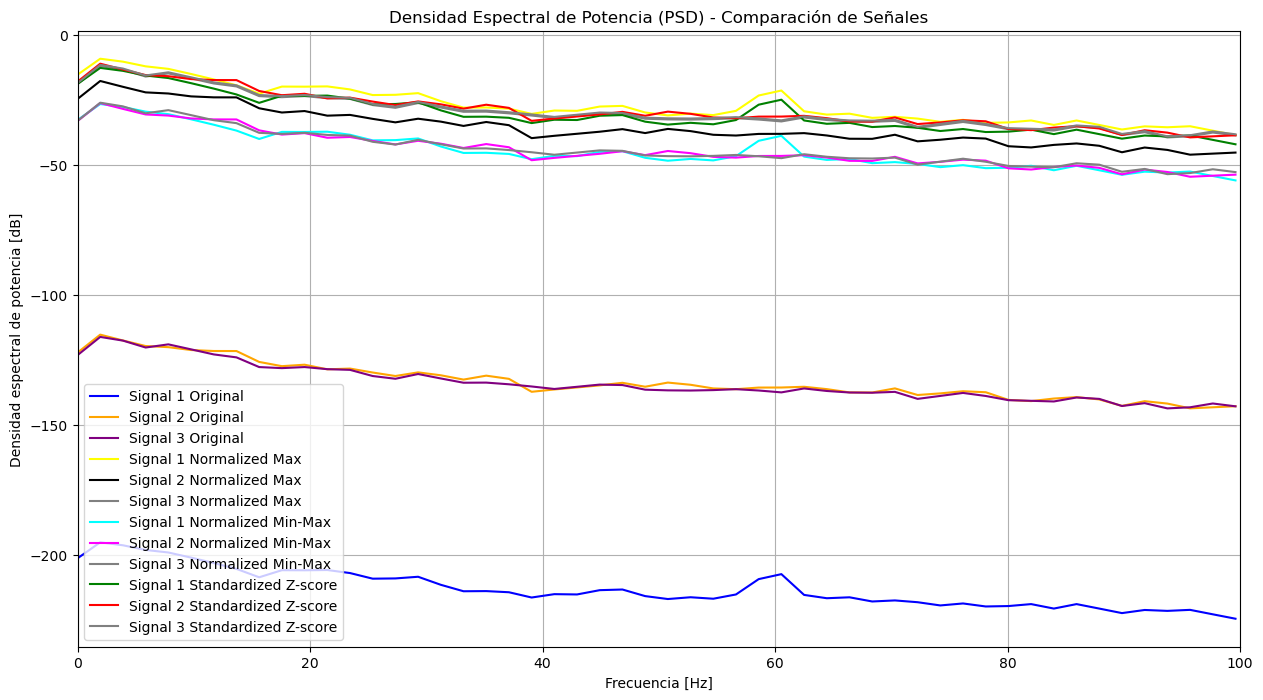

In [39]:


def read_signals(file_path):
    return np.loadtxt(file_path)

def normalize_max(signal):
    return signal/np.max(signal)

def normalize_min_max(signal):
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

# Función de estandarización Z-score
def standardize_z_score(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Función para calcular y graficar la PSD
def plot_psd(signal_data, fs, label, color):
    frequencies, psd = signal.welch(signal_data, fs=fs, nperseg=256, noverlap=128)
    idx = frequencies <= 100
    plt.plot(frequencies[idx], 10 * np.log10(abs(psd[idx])), label=label, color=color)

# Parámetros
fs = 500  # Frecuencia de muestreo (ajusta según sea necesario)

# Leer las señales de archivos de texto
signal1 = read_signals('P3_MNE.txt')*1e-4
signal2 = read_signals('P4_MNE.txt')
signal3 = read_signals('Pz_MNE.txt')

# Graficar PSD de las señales originales
plt.figure(figsize=(15, 8))
plot_psd(signal1, fs, 'Signal 1 Original', 'blue')
plot_psd(signal2, fs, 'Signal 2 Original', 'orange')
plot_psd(signal3, fs, 'Signal 3 Original', 'purple')

# Normalizar las señales
signal1_max = normalize_max(signal1)
signal2_max = normalize_max(signal2)
signal3_max = normalize_max(signal3)


signal1_min_max = normalize_min_max(signal1)
signal2_min_max = normalize_min_max(signal2)
signal3_min_max = normalize_min_max(signal3)


signal1_z_score = standardize_z_score(signal1)
signal2_z_score = standardize_z_score(signal2)
signal3_z_score = standardize_z_score(signal3)


# Graficar PSD de las señales normalizadas (Min-Max)
plot_psd(signal1_max, fs, 'Signal 1 Normalized Max',"yellow")
plot_psd(signal2_max, fs, 'Signal 2 Normalized Max',"black")
plot_psd(signal3_max, fs, 'Signal 3 Normalized Max',"grey")

# Graficar PSD de las señales normalizadas (Min-Max)
plot_psd(signal1_min_max, fs, 'Signal 1 Normalized Min-Max', 'cyan')
plot_psd(signal2_min_max, fs, 'Signal 2 Normalized Min-Max', 'magenta')
plot_psd(signal3_min_max, fs, 'Signal 3 Normalized Min-Max', 'grey')

# Graficar PSD de las señales estandarizadas (Z-score)
plot_psd(signal1_z_score, fs, 'Signal 1 Standardized Z-score', 'green')
plot_psd(signal2_z_score, fs, 'Signal 2 Standardized Z-score', 'red')
plot_psd(signal3_z_score, fs, 'Signal 3 Standardized Z-score', 'grey')


# Configurar el gráfico
plt.title('Densidad Espectral de Potencia (PSD) - Comparación de Señales')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [dB]')
plt.xlim(0, 100)  # Limitar el eje x hasta 100 Hz
plt.legend()
plt.grid()
plt.show()
